# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Fill in the missing value of fare

In [3]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [4]:
missing_value = test_data[(test_data['Pclass'] == 3) & (test_data['Embarked'] == 'S')].Fare.mean()
test_data.Fare.fillna(missing_value, inplace=True)

In [5]:
test_data.loc[test_data['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.91303,NaN,S


# Log transformation
- Since the value of fare is wildly distributed, so let's transform it by log function.

In [6]:
import numpy as np

train_data['Fare'] = train_data['Fare'].apply(lambda x: np.log10(x+1))
test_data['Fare'] = test_data['Fare'].apply(lambda x: np.log10(x+1))

# Histogram

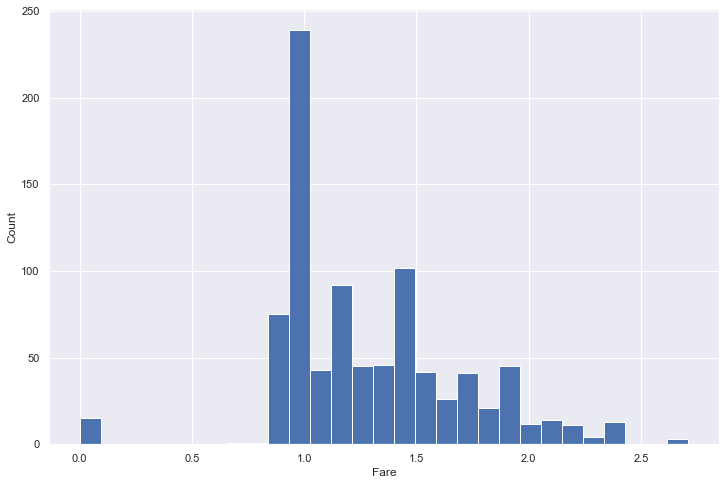

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
n_data = train_data.shape[0]
n_bins = int(np.sqrt(n_data))
plt.hist(train_data['Fare'], bins=n_bins)

plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Swarm plot

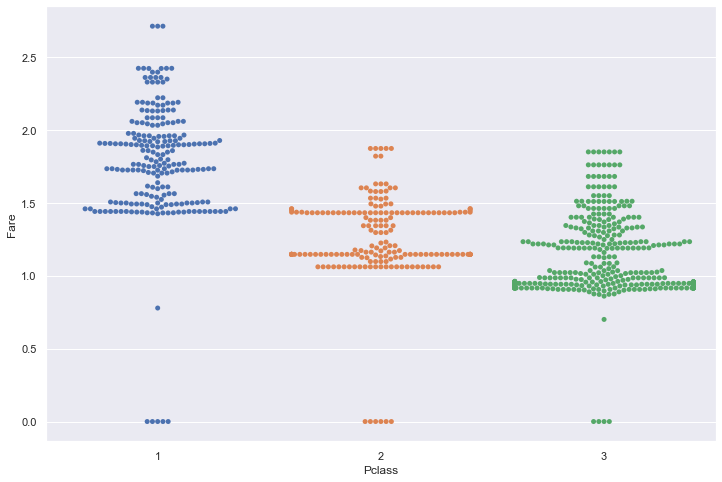

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.swarmplot(x='Pclass', y='Fare', data=train_data)
plt.show()

# Empirical cumulative distribution function (ECDF)

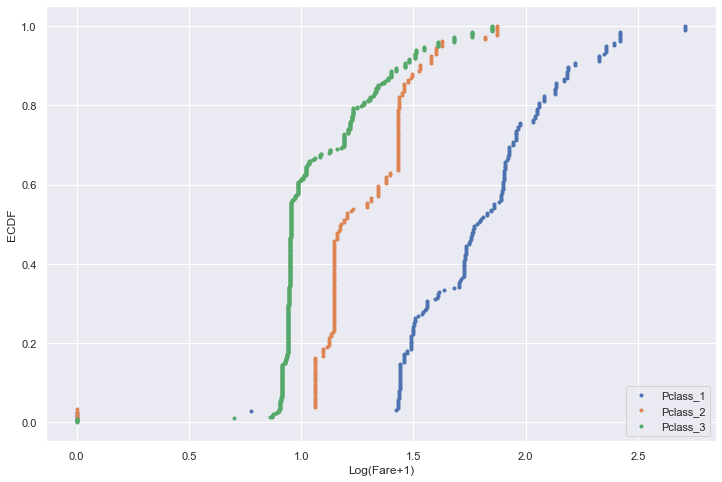

In [9]:
def ecdf(data):
    n_data = len(data)
    
    x = np.sort(data)
    y = np.arange(1, n_data + 1) / n_data
    
    return x, y
    
P1_fare, y1 = ecdf(train_data[train_data['Pclass'] == 1]['Fare'])
P2_fare, y2 = ecdf(train_data[train_data['Pclass'] == 2]['Fare'])
P3_fare, y3 = ecdf(train_data[train_data['Pclass'] == 3]['Fare'])

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(P1_fare, y1, marker='.', linestyle='none')
plt.plot(P2_fare, y2, marker='.', linestyle='none')
plt.plot(P3_fare, y3, marker='.', linestyle='none')
plt.legend(('Pclass_1', 'Pclass_2', 'Pclass_3'), loc='lower right')
_ = plt.xlabel('Log(Fare+1)')
_ = plt.ylabel('ECDF')
plt.show()

# Add survival relation

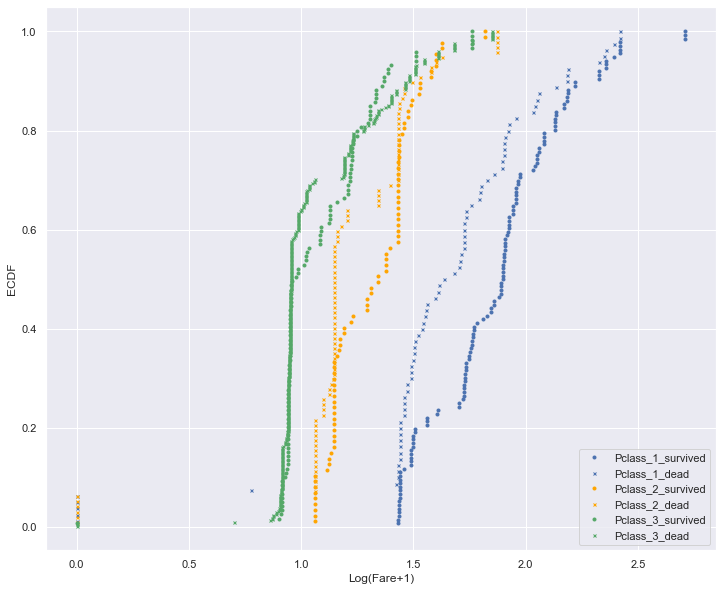

In [10]:
P1_fare_survived, y1_1 = ecdf(train_data[(train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]['Fare'])
P1_fare_dead, y1_0 = ecdf(train_data[(train_data['Pclass'] == 1) & (train_data['Survived'] == 0)]['Fare'])

P2_fare_survived, y2_1 = ecdf(train_data[(train_data['Pclass'] == 2) & (train_data['Survived'] == 1)]['Fare'])
P2_fare_dead, y2_0 = ecdf(train_data[(train_data['Pclass'] == 2) & (train_data['Survived'] == 0)]['Fare'])

P3_fare_survived, y3_1 = ecdf(train_data[(train_data['Pclass'] == 3) & (train_data['Survived'] == 1)]['Fare'])
P3_fare_dead, y3_0 = ecdf(train_data[(train_data['Pclass'] == 3) & (train_data['Survived'] == 0)]['Fare'])

fig, ax = plt.subplots(figsize=(12,10))
plt.plot(P1_fare_survived, y1_1, marker='o', markersize=3, linestyle='none', c='b')
plt.plot(P1_fare_dead, y1_0, marker='x', markersize=3, linestyle='none', c='b')

plt.plot(P2_fare_survived, y2_1, marker='o', markersize=3, linestyle='none', c='orange')
plt.plot(P2_fare_dead, y2_0, marker='x', markersize=3, linestyle='none', c='orange')

plt.plot(P3_fare_survived, y3_1, marker='o', markersize=3, linestyle='none', c='g')
plt.plot(P3_fare_dead, y3_0, marker='x', markersize=3, linestyle='none', c='g')

plt.legend(('Pclass_1_survived', 'Pclass_1_dead', 'Pclass_2_survived', 
            'Pclass_2_dead', 'Pclass_3_survived', 'Pclass_3_dead'), loc='lower right')
plt.xlabel('Log(Fare+1)')
plt.ylabel('ECDF')
plt.show()